In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sp
import random
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


#read car data
data = pd.read_csv('data/car_data.csv')
data_ip = data[['Annual Income', 'Price ($)']]

In [42]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [44]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [45]:
data = data.fillna('0')

<AxesSubplot: xlabel='Annual Income'>

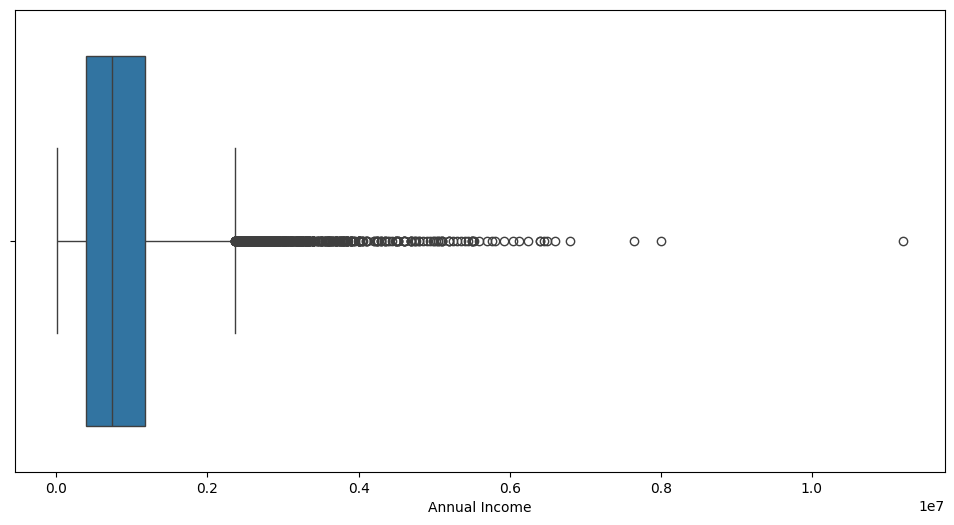

In [46]:
#Boxplot- Annual Income
plt.figure(figsize=(12,6))
sns.boxplot(data=data_ip['Annual Income'], orient='h')

<AxesSubplot: xlabel='Price ($)'>

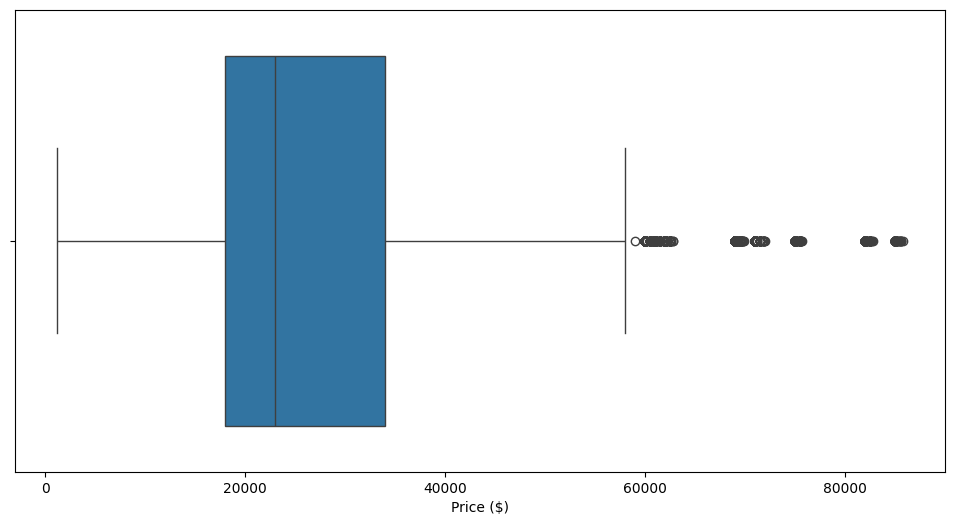

In [47]:
#Boxplot- Price
plt.figure(figsize=(12,6))
sns.boxplot(data=data_ip['Price ($)'], orient='h')

<AxesSubplot: >

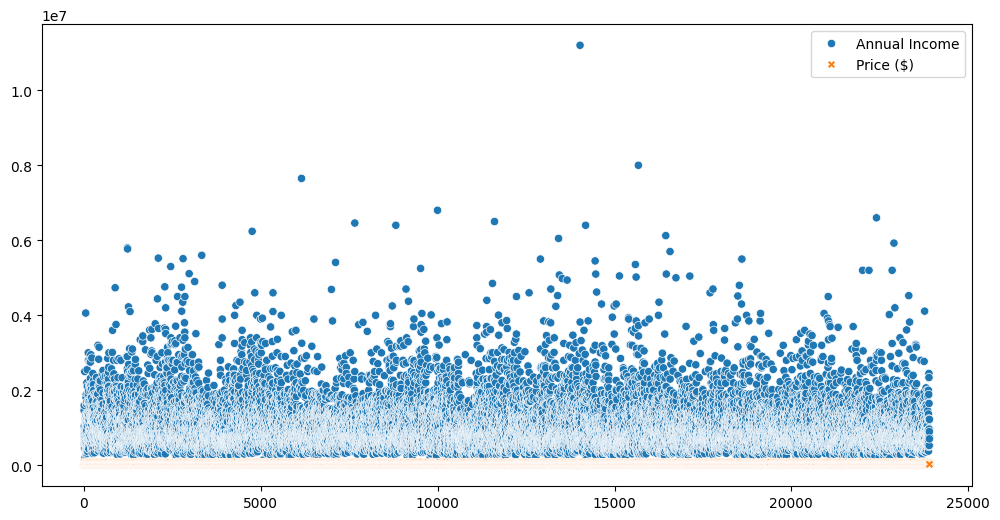

In [48]:
#scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data_ip)

<AxesSubplot: ylabel='Count'>

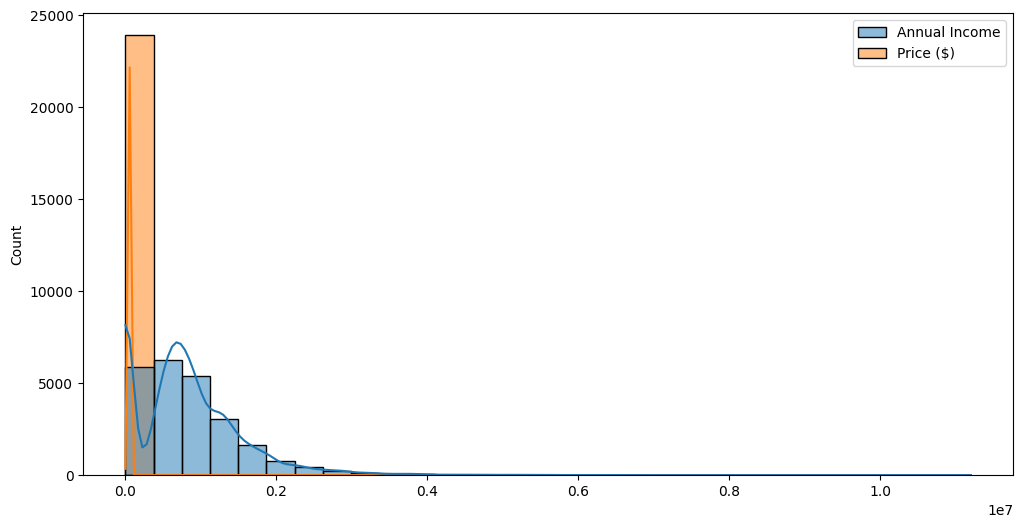

In [49]:
#histogram
plt.figure(figsize=(12,6))
sns.histplot(data_ip, bins=30, kde=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [51]:
#use pandas to separate the date
data['Date'] = pd.to_datetime(data['Date'])
# store year, month, day 
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', axis=1, inplace=True)
data.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Day
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,2
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,2
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,2
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,2
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,2


In [52]:
#Encode the categorical data into numerical data
string_columns = data.select_dtypes('object').columns
for col in string_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [72]:
data.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Day
0,0,1051,1,13500,0,8,60,0,0,0,26000,0,3,8264678,4,2022,1,2
1,1,1058,1,1480000,1,7,52,0,0,0,19000,3,3,6848189,0,2022,1,2
2,2,1062,1,1035000,2,4,57,1,1,2,31500,1,2,7298798,2,2022,1,2
3,3,1069,1,13500,4,27,36,1,1,1,14000,6,3,6257557,5,2022,1,2
4,4,1084,1,1465000,3,0,141,0,0,2,24500,2,1,7081483,3,2022,1,2


In [74]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

In [85]:
kmo_all, kmo_model = calculate_kmo(data_norm)
print('KMO Model Score: ', kmo_model)

KMO Model Score:  0.315606287000838


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [95]:
chi_square, p_value = calculate_bartlett_sphericity(data)
print("Bartlett's Test of Sphericity:")
print("p-value: ", p_value)

Bartlett's Test of Sphericity:
p-value:  0.0


Number of factors (Kaiser-Guttman rule): 9


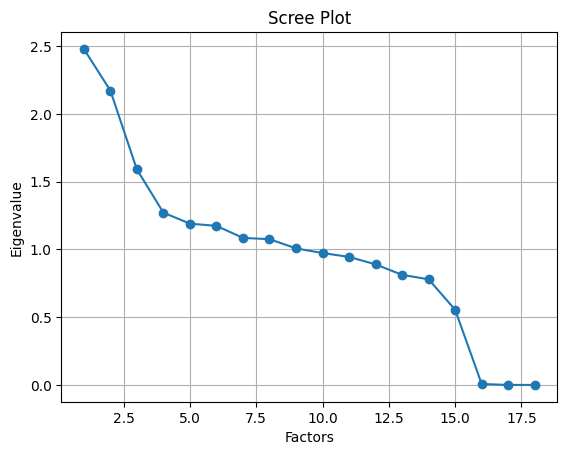

In [87]:
# Perform factor analysis
corr = np.corrcoef(data_norm, rowvar=False)
n_factors = data.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None)
fa.fit(corr)

# Get factor loadings
loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
idx = np.where(ev > 1)[0]

#counts the number of elements in idx, which represents the number of eigenvalues greater than 1.
n_factors_kg = idx.size
print(f"Number of factors (Kaiser-Guttman rule): {n_factors_kg}")

# Scree plot
plt.plot(range(1,n_factors+1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [88]:
feature_eigenvalues = np.sum(loadings**2, axis=1)

# Print eigenvalues for each feature
for i, eigenvalue in enumerate(feature_eigenvalues):
    print(f"Eigenvalue for feature {i+1}: {eigenvalue}")

Eigenvalue for feature 1: 0.9975717932354989
Eigenvalue for feature 2: 0.9950009068609057
Eigenvalue for feature 3: 0.995000635634048
Eigenvalue for feature 4: 0.9950007025692068
Eigenvalue for feature 5: 0.9950005575745806
Eigenvalue for feature 6: 0.9950005629586911
Eigenvalue for feature 7: 0.9950004726531559
Eigenvalue for feature 8: 0.9975003693974814
Eigenvalue for feature 9: 0.9975003693974815
Eigenvalue for feature 10: 0.9950007438445412
Eigenvalue for feature 11: 0.9950005976257665
Eigenvalue for feature 12: 0.9950003283943856
Eigenvalue for feature 13: 0.9950006931552158
Eigenvalue for feature 14: 0.9950008245283473
Eigenvalue for feature 15: 0.9950005170595058
Eigenvalue for feature 16: 0.9969424015608759
Eigenvalue for feature 17: 0.9954701431312638
Eigenvalue for feature 18: 0.99500738041905


In [89]:
feature_names = data.columns

# Get selected features based on Kaiser-Guttman rule
selected_features_loadings = loadings[:, idx]
print(selected_features_loadings)

# Associate selected feature loadings with feature names
selected_features = []
for i in range(selected_features_loadings.shape[1]):
    factor_loadings = selected_features_loadings[:, i]
    factor_selected_features = [feature_names[j] for j in range(len(factor_loadings)) if abs(factor_loadings[j]) > 0.5]  # Adjust threshold as needed
    selected_features.append(factor_selected_features)

print("Selected features based on Kaiser-Guttman rule:")
for i, factor_features in enumerate(selected_features):
    print(f"Factor {i+1}: {factor_features}")

[[ 0.88972585  0.42100984  0.05471173  0.0534444   0.07473475  0.01285379
   0.04651047  0.02291283 -0.02474195]
 [ 0.08979066 -0.02662159 -0.01568466 -0.15146667 -0.73733494 -0.21988637
   0.04637941  0.06295352  0.019669  ]
 [-0.07415211 -0.14321614 -0.1489658  -0.38069903 -0.0577144   0.50662064
   0.34450279  0.14813351  0.0453984 ]
 [-0.13855604 -0.20354955 -0.20993776 -0.33826288 -0.03164139  0.42932773
   0.09099078  0.10142734 -0.04477722]
 [-0.03164137 -0.24946555  0.41533925  0.20352784 -0.08241084  0.22729145
  -0.12521863 -0.17490311 -0.68849401]
 [-0.06973005 -0.19423692 -0.40293878  0.47029097  0.00909176 -0.13533928
   0.30440191  0.09684188  0.1139089 ]
 [-0.25250725  0.21898177 -0.23263766  0.57753555 -0.12684213  0.17281132
  -0.01898278  0.08003874  0.17884773]
 [-0.54830338  0.79338989  0.19739435 -0.08053663  0.01694475 -0.03202871
   0.00869058  0.0189245  -0.02311144]
 [-0.54830338  0.79338989  0.19739435 -0.08053663  0.01694475 -0.03202871
   0.00869058  0.01892

In [93]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(data)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         variable         VIF
0           const    0.000000
1          Car_id  106.001259
2   Customer Name    1.006073
3          Gender    1.005009
4   Annual Income    1.004760
5     Dealer_Name    1.027559
6         Company    1.013817
7           Model    1.027988
8          Engine         inf
9    Transmission         inf
10          Color    1.006518
11      Price ($)    1.004297
12     Dealer_No     1.081116
13     Body Style    1.008580
14          Phone    1.000461
15  Dealer_Region    1.055293
16           Year   81.891941
17          Month   27.289066
18            Day    1.231265
